In [1]:
import sys
sys.path.append('../../')

import numpy as np

In [2]:
from src.mechanism.contest_game import ContestGame
from src.game import Game
from src.strategy import Strategy
from src.learner.soda import SODA
from src.learner.frank_wolfe import FrankWolfe

In [43]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1':[0,1]}
a_space = {'1':[0,1]}

param_prior = {'distribution':'uniform'}
param_util = {'csf': 'ratio_form_valuation', 'param_csf': 1.0}

# parameter approximation game
n = 64
m = 64

# parameter learner
max_iter = int(1e3)
tol = 1e-5
steprule_bool = True
eta = 200
beta = 1/20

method = 'frank_wolfe'

In [44]:
# create mechanism
mechanism = ContestGame(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)

# create learner
if method == 'soda':
    learner = SODA(max_iter, tol, steprule_bool, eta, beta)
elif method == 'frank_wolfe':
    learner = FrankWolfe(max_iter, tol, steprule_bool)

#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')

In [45]:
# run soda
learner.run(mechanism, game, strategies)

 80%|████████████████    | 801/1.00k [00:00<00:00, 2.65kit/s]

Convergence after 801 iterations
Relative utility loss 0.001 %


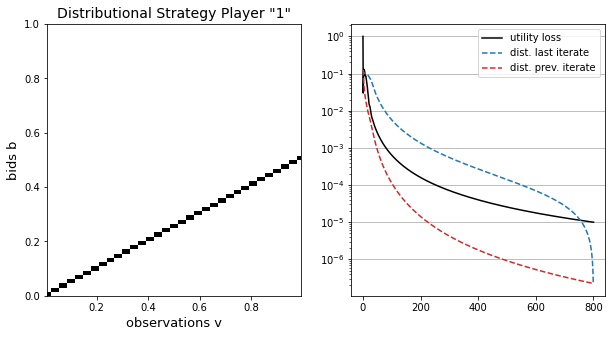

In [46]:
strategies['1'].plot(True)